<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Los Angeles County is a heavily populated county in California with 10,004,300 people living in it. Our schools are heavily populated along with schools that aren't. Which ones do we choose? This project will look into SAT and ACT performance, ranking top five and bottom five, for parents of college-seeking students.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

sat_2019_ca.csv(Using numbers from senior and junior classes based on counties)
act_2019_ca.csv(Using numbers senior classes based on counties.)

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

https://www.cde.ca.gov/ for SAT and ACT background information.
PPIC.org for research paper on future success based on math courses.
Wikipedia.com -- Number of school districts in Los Angeles County.
http://www.paramount.k12.ca.us/ for information on someone skewed information.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [257]:
# Code:
def col_mean(data):
    return (data.sum() / data.count())

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [258]:
# Code:
def stdev(data):
    return (sum([((x-col_mean(data))**2) / len(data) for x in data])) ** (.5)

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [259]:
# Code:
def perc_to_dec(data):
    for i in data:
        data[i] = data[i].map(lambda x: float(x.strip('%')/100))
    return data[i]

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [260]:
# Imports:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [261]:
# Code:
sat = pd.read_csv('data/sat_2019_ca.csv')
act = pd.read_csv('data/act_2019_ca.csv')

In [262]:
sat.drop(columns=['CDS','CCode','CDCode','SCode','RType','Unnamed: 25'],inplace=True)

In [263]:
act.drop(columns=['CDS', 'CCode','CDCode', 'SCode','RType','Unnamed: 17'],inplace=True)

In [264]:
SAT_column_names = ['school_name', 'district_name', 'county_name', 'enroll12', 'numtsttakr12',
       'numerwbenchmark12', 'pcterwbenchmark12', 'nummathbenchmark12',
       'pctmathbenchmark12', 'enroll11', 'numtsttakr11', 'numerwbenchmark11',
       'pcterwbenchmark11', 'nummathbenchmark11', 'pctmathbenchmark11',
       'totnumbothbenchmark12', 'pctbothbenchmark12', 'totnumbothbenchmark11',
       'pctbothbenchmark11', 'year']
sat.columns = SAT_column_names

In [265]:
ACT_column_names = ['school_name', 'district_name', 'county_name', 'enroll12', 'numtsttakr', 'avgscrread',
       'avgscreng', 'avgscrmath', 'avgscrsci', 'numge21', 'pctge21', 'year']
act.columns = ACT_column_names

In [266]:
sat = sat.drop(sat[(sat['numtsttakr12'] == 0) & (sat['numtsttakr11'] == 0)].index)
# dropping rows that don't have any useful data.

In [267]:
sat =  sat.drop(sat[(sat['numerwbenchmark11'] == '*') & (sat['numerwbenchmark12'] == '*')].index)
# getting rid of nulls that don't have useful data

In [268]:
sat.isnull().sum()

school_name              499
district_name             57
county_name                1
enroll12                   1
numtsttakr12               1
numerwbenchmark12        127
pcterwbenchmark12        127
nummathbenchmark12       127
pctmathbenchmark12       127
enroll11                   1
numtsttakr11               1
numerwbenchmark11        162
pcterwbenchmark11        162
nummathbenchmark11       162
pctmathbenchmark11       162
totnumbothbenchmark12    127
pctbothbenchmark12       127
totnumbothbenchmark11    162
pctbothbenchmark11       162
year                       1
dtype: int64

In [269]:
for i in act.columns[5:11]:
    act[i] = act[i].map(lambda x: np.nan if x == '*' else float(x))

In [270]:
for i in act.columns[0:2]:
    act[i] = act[i].map(lambda x: np.nan if type(x) != str else x)

In [271]:
for i in sat.columns[0:2]:
    sat[i] = sat[i].map(lambda x: np.nan if type(x) != str else x)

In [272]:
for i in sat.columns[5:9]:
    sat[i] = sat[i].map(lambda x: np.nan if x == '*' else float(x))

In [273]:
for i in sat.columns[11:19]:
    sat[i] = sat[i].map(lambda x: np.nan if x == '*' else float(x))
    
# above code is to remove string * and replace with null

In [274]:
sat.dropna(inplace=True)

In [275]:
act.dropna(inplace=True)
# finally removing all nulls

In [276]:
sat.drop(sat.tail(1).index, inplace=True)
# dropping the final line in this code because it gives a total of everything and could very
# well mess with the final calculations with such a big number

In [277]:
act.drop(act[act['school_name'] == 'State of California'].index, inplace=True)
# dropping another row that was a total of all of the rows

In [278]:
sat.to_csv('data/edited_sat.csv')

In [279]:
act.to_csv('data/edited_act.csv')

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|school_name|object|ACT/SAT|Name of the high school in California|
|district_name|object|ACT/SAT|Name of district the high school is in.|
|county_name|object|ACT/SAT|Name of county the district/high school is in.|
|enroll12|int|ACT/SAT|Number of students in school's senior class.|
|year|object|ACT/SAT|Year data was taken from.|
|numtsttakr12|int|SAT|Number of seniors that took 1 or more SAT test.|
|numerwbenchmark12|float|SAT|Number of seniors who met the Evidence-based Reading and Writing test.|
|pcterwbenchmark12|float|SAT|Percentage of senior test takers who met the ERW benchmark.|
|nummathbenchmark12|float|SAT|Number of seniors who met the math benchmark.|
|pctmathbenchmark12|float|SAT|Percentage of senior test takers who met the math benchmark.|
|enroll11|int|SAT|Number of students in school's junior class.|
|numtsttakr11|int|SAT|Number of students in junior class who took 1 or more SAT test.|
|numerwbenchmark11|float|SAT|Number of juniors who met the Evidence-based Reading and Writing test.|
|pcterwbnenchmark11|float|SAT|Percentage of junior test takers who met the ERW benchmark.|
|nummathbenchmark11|float|SAT|Number of seniors who met the math benchmark.|
|pctmathbenchmark11|float|SAT|Percentage of junior test takers who met the math benchmark.|
|totnumbothbenchmark12|float|SAT|Number of seniors who met both benchmarks.|
|pctbothbenchmark12|float|SAT|Percentage of seniors who met both benchmarks.|
|totnumbothbenchmark11|float|SAT|Number of juniors who met both benchmarks.|
|pctbothbenchmark11|float|SAT|Percentage of juniors who met both benchmarks.|
|numtsttakr|int|ACT|Number of seniors who have taken the ACT.|
|avgscrread|float|ACT|Average score of the reading porition of the ACT for seniors.|
|avgscreng|float|ACT|Average score of the english portion of the ACT for seniors.|
|avgscrmath|float|ACT|Average score for the math portion of the ACT for seniors.|
|avgscrsci|float|ACT|Average score for the science porition of the ACT for seniors.|
|numge21|float|ACT|Number of test takers whose ACT composite scores are greater or equal to 21|
|pctge21|float|ACT|Percent of test takers whose ACT composite scores are greater or equal to 21


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [280]:
my_sat = pd.read_csv('data/edited_sat.csv')
my_act = pd.read_csv('data/edited_act.csv')

In [281]:
#Code:
my_sat[['numtsttakr12',
        'numerwbenchmark12',
        'pcterwbenchmark12',
        'nummathbenchmark12',
        'pctmathbenchmark12',
        'numtsttakr11',
       'numerwbenchmark11',
       'pcterwbenchmark11',
       'nummathbenchmark11',
       'pctmathbenchmark11',
       'totnumbothbenchmark12',
        'pctbothbenchmark12',
        'totnumbothbenchmark11',
        'pctbothbenchmark11',]].describe()

,numtsttakr12,numerwbenchmark12,pcterwbenchmark12,nummathbenchmark12,pctmathbenchmark12,numtsttakr11,numerwbenchmark11,pcterwbenchmark11,nummathbenchmark11,pctmathbenchmark11,totnumbothbenchmark12,pctbothbenchmark12,totnumbothbenchmark11,pctbothbenchmark11
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,138.655259,95.383139,67.391085,67.093489,45.252529,167.989149,118.153589,71.748047,89.159432,53.486828,63.510017,42.790392,85.280467,51.018205
std,106.173762,76.676621,20.773616,63.885664,23.592428,142.289223,101.222402,22.189770,88.907199,27.221903,61.702275,23.600005,87.184714,27.410484
min,15.000000,2.000000,2.470000,0.000000,0.000000,15.000000,1.000000,2.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,36.000000,51.867500,18.000000,25.707500,65.000000,42.000000,56.505000,25.000000,29.395000,17.000000,23.337500,23.000000,26.835000
50%,113.000000,75.000000,70.530000,45.000000,43.560000,121.000000,83.000000,76.470000,58.000000,55.060000,42.000000,40.535000,53.500000,52.495000
75%,186.000000,138.000000,85.155000,97.000000,64.515000,228.000000,168.000000,90.947500,127.000000,77.192500,91.000000,61.540000,119.750000,74.672500
max,932.000000,475.000000,100.000000,390.000000,100.000000,1058.000000,566.000000,100.000000,552.000000,100.000000,385.000000,100.000000,549.000000,99.680000


In [282]:
my_act[['enroll12',
       'numtsttakr',
       'avgscrread',
       'avgscreng',
       'avgscrmath',
       'avgscrsci',
       'numge21',
       'pctge21']].describe()

,enroll12,numtsttakr,avgscrread,avgscreng,avgscrmath,avgscrsci,numge21,pctge21
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000
mean,371.831693,79.144685,21.870079,21.017717,21.270669,21.189961,43.673228,51.306850
std,206.213129,66.574849,3.823038,4.209031,3.499833,3.335189,50.111339,26.534076
min,0.000000,15.000000,12.000000,10.000000,14.000000,12.000000,0.000000,0.000000
25%,173.000000,33.000000,19.000000,18.000000,18.000000,19.000000,12.000000,28.570000
50%,382.000000,58.000000,22.000000,21.000000,21.000000,21.000000,24.000000,52.860000
75%,524.000000,105.000000,25.000000,24.000000,24.000000,24.000000,55.000000,74.700000
max,1135.000000,512.000000,32.000000,32.000000,32.000000,31.000000,392.000000,100.000000


In [289]:
my_sat.drop(columns = 'Unnamed: 0', inplace=True)

In [290]:
my_act.drop(columns = 'Unnamed: 0', inplace=True)

In [291]:
sd = {col:stdev(my_sat[col]) for col in my_sat.columns[3:19]}
sd.update({col:stdev(my_act[col]) for col in my_act.columns[3:11]})

In [ ]:
la_sat = my_sat[my_sat['county_name'] == 'Los Angeles']

In [ ]:
la_act = my_act[my_act['county_name'] == 'Los Angeles']

In [ ]:
la_sat.groupby('district_name')['pcterwbenchmark12'].mean().sort_values(ascending=False).head(5).append(la_sat.groupby('district_name')['pcterwbenchmark12'].mean().sort_values(ascending=False).tail(5))

In [ ]:
la_sat.groupby('district_name')['pctmathbenchmark12'].mean().sort_values(ascending=False).head(5).append(la_sat.groupby('district_name')['pctmathbenchmark12'].mean().sort_values(ascending=False).tail(5))

In [ ]:
la_act.groupby('district_name')['avgscrread'].mean().sort_values(ascending=False).head(5).append(la_act.groupby('district_name')['avgscrread'].mean().sort_values(ascending=False).tail(5))

In [ ]:
la_act.groupby('district_name')['avgscreng'].mean().sort_values(ascending=False).head(5).append(la_act.groupby('district_name')['avgscreng'].mean().sort_values(ascending=False).tail(5))

In [ ]:
la_act.groupby('district_name')['avgscrsci'].mean().sort_values(ascending=False).head(5).append(la_act.groupby('district_name')['avgscrsci'].mean().sort_values(ascending=False).tail(5))

In [ ]:
la_act.groupby('district_name')['avgscrmath'].mean().sort_values(ascending=False).head(5).append(la_act.groupby('district_name')['avgscrmath'].mean().sort_values(ascending=False).tail(5))

In [ ]:
above_enroll12_mean = (la_sat['enroll12'] > 296)
below_enroll12_mean = (la_sat['enroll12'] < 296)
above_enroll12_25percentile = (la_sat['enroll12'] >= 116)
below_enroll12_75percentile = (la_sat['enroll12'] <= 452)

In [ ]:
la_sat[above_enroll12_mean & below_enroll12_75percentile & (la_sat['pctmathbenchmark12'] > 50)].shape[0] / la_sat[above_enroll12_mean & below_enroll12_75percentile].shape[0]
#the percent of districts with higher than the mean 
#but below 75%tile having over 50% of test takers meet 
#their math benchmark

In [ ]:
la_sat[above_enroll12_mean & below_enroll12_75percentile & (la_sat['pcterwbenchmark12'] > 50)].shape[0] / la_sat[above_enroll12_mean & below_enroll12_75percentile].shape[0]
#the percent of districts with higher than the mean 
#but below 75%tile having over 50% of test takers meet 
#their ERW benchmark

In [ ]:
la_sat[below_enroll12_mean & above_enroll12_25percentile & (la_sat['pctmathbenchmark12'] > 50)].shape[0] / la_sat[below_enroll12_mean & above_enroll12_25percentile].shape[0]
#the percent of districts with lower than the mean 
#but higher than 25%tile having over 50% of test takers meet 
#their Math benchmark

In [ ]:
la_sat[below_enroll12_mean & above_enroll12_25percentile & (la_sat['pcterwbenchmark12'] > 50)].shape[0] / la_sat[below_enroll12_mean & above_enroll12_25percentile].shape[0]
#the percent of districts with lower than the mean 
#but higher than 25%tile having over 50% of test takers meet 
#their ERW benchmark

In [ ]:
la_sat[below_enroll12_mean & (la_sat['pcterwbenchmark12'] > 50)].shape[0] / la_sat[below_enroll12_mean].shape[0]
#the percent of districts with lower than mean
#having over 50% of test takers meet their ERW benchmark

In [ ]:
la_sat[below_enroll12_mean & (la_sat['pctmathbenchmark12'] > 50)].shape[0] / la_sat[below_enroll12_mean].shape[0]
#the percent of districts with lower than mean
#having over 50% of test takers meet their Math benchmark

In [ ]:
la_act.describe()

In [ ]:
actenroll12abovemean = (la_act['enroll12'] > 330)
actenroll12belowmean = (la_act['enroll12'] < 330)
actenroll12below75 = (la_act['enroll12'] < 509)
actenroll12above25 = (la_act['enroll12'] > 126)

In [ ]:
la_act[actenroll12abovemean & actenroll12below75 & (la_act['avgscrread'] >= 22)].shape[0] / (la_act[actenroll12abovemean & actenroll12below75]).shape[0]
#this shows the percentage of districts with senior classes
#above the mean but below the 75%tile meeting the required
#reading benchmark

In [ ]:
la_act[actenroll12abovemean & actenroll12below75 & (la_act['avgscrmath'] >= 22)].shape[0] / (la_act[actenroll12abovemean & actenroll12below75]).shape[0]
#this shows the percentage of districts with senior classes
#above the mean but below the 75%tile meeting the required
#math benchmark

In [ ]:
la_act[actenroll12abovemean & actenroll12below75 & (la_act['avgscreng'] >= 18)].shape[0] / (la_act[actenroll12abovemean & actenroll12below75]).shape[0]
#this shows the percentage of districts with senior classes
#above the mean but below the 75%tile meeting the required
#english benchmark

In [ ]:
la_act[actenroll12abovemean & actenroll12below75 & (la_act['avgscrsci'] >= 23)].shape[0] / (la_act[actenroll12abovemean & actenroll12below75]).shape[0]
#this shows the percentage of districts with senior classes
#above the mean but below the 75%tile meeting the required
#science benchmark

In [ ]:
la_act[actenroll12belowmean & actenroll12above25 & (la_act['avgscrread'] >= 22)].shape[0] / (la_act[actenroll12belowmean & actenroll12above25]).shape[0]
#this shows the percentage of districts with senior classes
#below the mean but above the 25%tile meeting the required
#reading benchmark

In [ ]:
la_act[actenroll12belowmean & actenroll12above25 & (la_act['avgscrmath'] >= 22)].shape[0] / (la_act[actenroll12belowmean & actenroll12above25]).shape[0]
#this shows the percentage of districts with senior classes
#below the mean but above the 25%tile meeting the required
#math benchmark

In [ ]:
la_act[actenroll12belowmean & actenroll12above25 & (la_act['avgscreng'] >= 18)].shape[0] / (la_act[actenroll12belowmean & actenroll12above25]).shape[0]
#this shows the percentage of districts with senior classes
#below the mean but above the 25%tile meeting the required
#english benchmark

In [ ]:
la_act[actenroll12belowmean & actenroll12above25 & (la_act['avgscrsci'] >= 23)].shape[0] / (la_act[actenroll12belowmean & actenroll12above25]).shape[0]
#this shows the percentage of districts with senior classes
#below the mean but above the 25%tile meeting the required
#science benchmark

In [ ]:
la_act[actenroll12belowmean & (la_act['avgscrsci'] >= 23)].shape[0] / (la_act[actenroll12belowmean]).shape[0]
#this shows the percentage of districts with senior classes
#below the mean meeting the required
#science benchmark

In [ ]:
la_act[actenroll12belowmean & (la_act['avgscreng'] >= 18)].shape[0] / (la_act[actenroll12belowmean]).shape[0]
#this shows the percentage of districts with senior classes
#below the mean meeting the required
#english benchmark

In [ ]:
la_act[actenroll12belowmean & (la_act['avgscrread'] >= 22)].shape[0] / (la_act[actenroll12belowmean]).shape[0]
#this shows the percentage of districts with senior classes
#below the mean meeting the required
#reading benchmark

In [ ]:
la_act[actenroll12belowmean & (la_act['avgscrmath'] >= 22)].shape[0] / (la_act[actenroll12belowmean]).shape[0]
#this shows the percentage of districts with senior classes
#below the mean meeting the required
#math benchmark

There is a correlation between high school senior population in sweet spots between 25% to mean and mean to 75%. Minuscule, but students at high schools with senior classes above the mean but less than 75% have better chances of performing better on the SAT's and ACT's than those of a smaller senior class. Even in more robust senior classes there are still better likelihoods of success better than a small class.

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

There is a correlation between high school senior population in sweet spots between 25% to mean and mean to 75%. Minuscule, but students at high schools with senior classes above the mean but less than 75% have better chances of performing better on the SAT's and ACT's than those of a smaller senior class. Even in more robust senior classes there are still better likelihoods of success better than a small class.

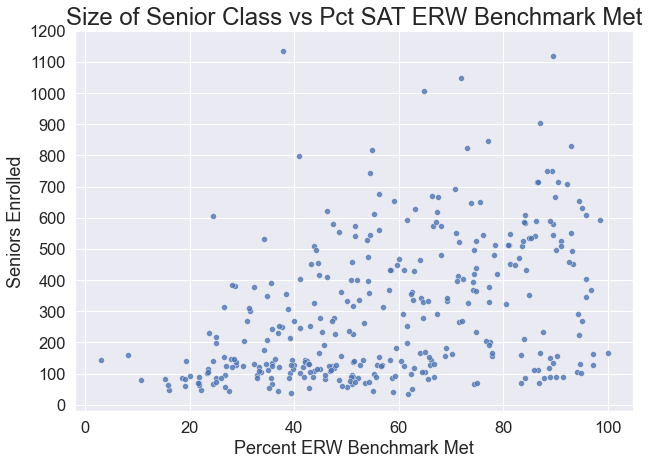

In [176]:
# Code
a4_dims = (10, 7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, data=la_sat, x="pcterwbenchmark12", y="enroll12", alpha=.8)
sns.set(font_scale=1.5)
plt.yticks(range(0,1201,100));
plt.xlabel('Percent ERW Benchmark Met')
plt.ylabel('Seniors Enrolled');
plt.title("Size of Senior Class vs Pct SAT ERW Benchmark Met", size=24);

Here is the correlation between size of senior class and SAT ERW Benchmarks being met.

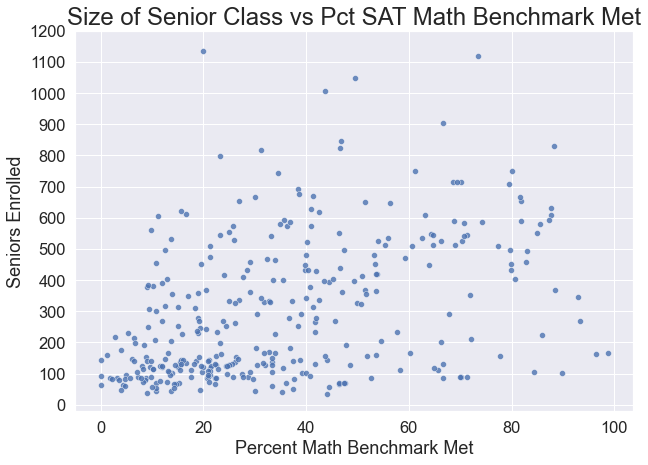

In [155]:
a4_dims = (10, 7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, data=la_sat, x="pctmathbenchmark12", y="enroll12", alpha=.8)
sns.set(font_scale=1.5)
plt.yticks(range(0,1201,100));
plt.xlabel('Percent Math Benchmark Met')
plt.ylabel('Seniors Enrolled');
plt.title("Size of Senior Class vs Pct SAT Math Benchmark Met", size=24);

Here is the correlation between size of senior class and SAT Math Benchmarks being met.



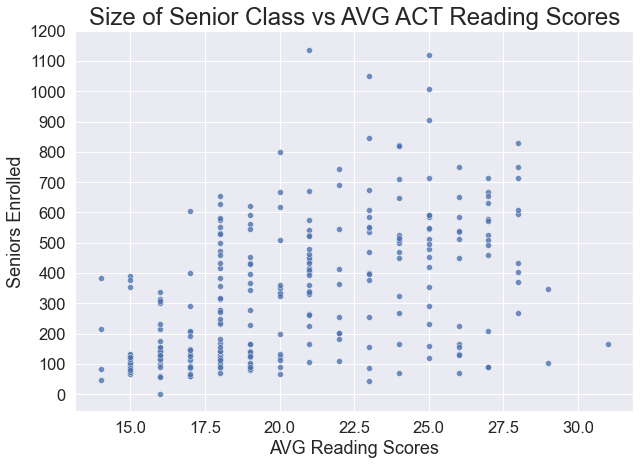

In [156]:
a4_dims = (10, 7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, data=la_act, x="avgscrread", y="enroll12", alpha=.8)
sns.set(font_scale=1.5)
plt.yticks(range(0,1201,100));
plt.xlabel('AVG Reading Scores')
plt.ylabel('Seniors Enrolled');
plt.title("Size of Senior Class vs AVG ACT Reading Scores", size=24);

Here is the correlation between size of senior class and ACT Reading scores. Passing for reading is 22.



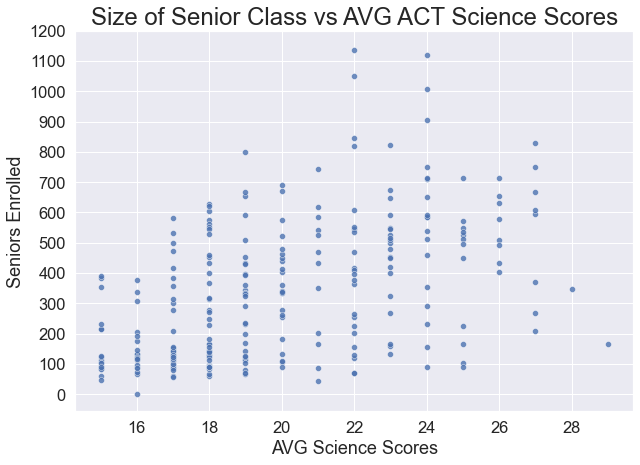

In [157]:
a4_dims = (10, 7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, data=la_act, x="avgscrsci", y="enroll12", alpha=.8)
sns.set(font_scale=1.5)
plt.yticks(range(0,1201,100));
plt.xlabel('AVG Science Scores')
plt.ylabel('Seniors Enrolled');
plt.title("Size of Senior Class vs AVG ACT Science Scores", size=24);

Here is the correlation between size of senior class and ACT Science scores. Passing for reading is 23.



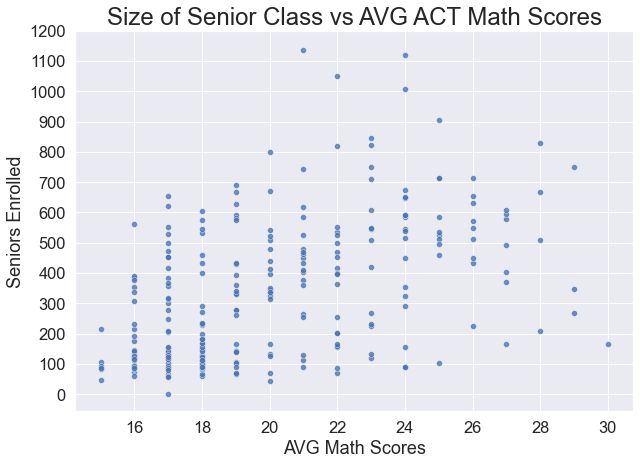

In [158]:
a4_dims = (10, 7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, data=la_act, x="avgscrmath", y="enroll12", alpha=.8)
sns.set(font_scale=1.5)
plt.yticks(range(0,1201,100));
plt.xlabel('AVG Math Scores')
plt.ylabel('Seniors Enrolled');
plt.title("Size of Senior Class vs AVG ACT Math Scores", size=24);

Here is the correlation between size of senior class and ACT Math scores. Passing for reading is 22.



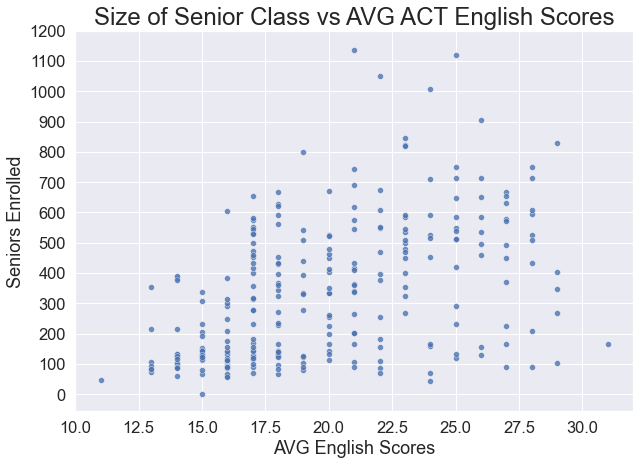

In [293]:
a4_dims = (10, 7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, data=la_act, x="avgscreng", y="enroll12", alpha=.8)
sns.set(font_scale=1.5)
plt.yticks(range(0,1201,100));
plt.xlabel('AVG English Scores')
plt.ylabel('Seniors Enrolled');
plt.title("Size of Senior Class vs AVG ACT English Scores", size=24);

Here is the correlation between size of senior class and ACT English scores. Passing for reading is 28.



## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

When you're looking into different parts of Los Angeles, CA with a family it is crucial to find a neighborhood that is in a good school district. Less doesn't always mean more, schools within a certain range of students in their senior classes perform better in preparing students for college. The top school districts in Los Angeles,CA based on just rankings doesn't always apply to every Californian because you can't just send your perspective student to any school at any address. You need to have your home address in that district. Finding the right schools with the right students in their senior class could still better the chances of your student's success.

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!